<a href="https://colab.research.google.com/github/vadim-privalov/Sorevnovania/blob/main/%D0%91%D0%B8%D0%BD%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BC%D0%B0%D0%B9_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Майский выпуск задачи бинарной классификации серии Tabular Playground 2022 года, которая включает в себя ряд различных взаимодействий функций. Это соревнование дает возможность изучить различные методы выявления и использования этих взаимодействий функций.**

Т.к. наш датасет большого размера (> 25Мб), то копируем его на Гугл диск, подключаем "Драйвер" связи ноутбука и диска и указываем путь к нашим данным

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Импортируем необходимые нам для работы библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import warnings
pd.options.display.max_rows = 10
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from random import sample
from sklearn.model_selection import cross_val_score, train_test_split
from  sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np # модуль для загрузки файлов в colab
import pandas as pd #библиотека для работы с таблицами pandas
from google.colab import files #библиотека для работы с массивами данных
import json

from sklearn.model_selection import train_test_split
import tensorflow as tf # импортируем tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer,tokenizer_from_json
from tensorflow.keras.utils import plot_model, get_file, to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,load_model
# Загружаем стандартные слои нейросети(полносвязный, регуляризации, нормализации, векторного представления слов, выравнивания, активации)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
# Загружаем сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
# Загружаем рекуррентные слои
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import csv # импортируем модуль для удобной работы с файлами
import matplotlib as mpl
import matplotlib.pyplot as plt #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from google.colab import files

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf # импортируем tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer,tokenizer_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Embedding, SpatialDropout1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import zipfile # для работы с архивами zip

import os
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline
import time, logging, gc
from sklearn.preprocessing import RobustScaler, StandardScaler

from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.callbacks import *
from sklearn.model_selection import KFold
from tensorflow.keras.metrics import AUC
import matplotlib.pyplot as plt

Загружаем наш датафрейм и открываем его

In [ ]:
df_train = pd.read_csv(filepath_or_buffer = "/content/drive/MyDrive/my_databases/tabular-playground-series-may-2022/train.csv",
                           sep = ',')
df_train

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899995,899995,1.380145,-0.038884,0.597111,0.854560,0.684301,-1.058618,1.310699,2,1,...,-1.594744,0.522019,0.833047,2.714125,1.290094,BABBCBBBED,455.033851,0,2,1
899996,899996,-1.369789,0.044841,0.015458,0.376565,-0.380529,-0.830815,-1.798458,4,1,...,2.413899,-0.674942,-0.412111,-0.030436,-3.144047,BBBGBBDQBE,134.703577,0,1,0
899997,899997,1.386201,-0.961150,0.725994,-0.132844,0.873911,-0.245339,-1.045786,0,0,...,-0.151930,-4.560773,-1.249154,1.793535,2.253696,AEBEDBBHBA,-99.536313,0,1,0
899998,899998,-1.590572,-0.509938,-1.715397,-0.249988,1.359933,1.650808,-0.058592,0,2,...,2.423670,2.110008,0.561271,-2.149610,1.019982,ADBAAADDAE,47.823039,1,2,0


In [ ]:
df_test = pd.read_csv(filepath_or_buffer = "/content/drive/MyDrive/my_databases/tabular-playground-series-may-2022/test.csv",
                           sep = ',')
df_test

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,1599995,0.640110,0.897808,-0.523956,1.563760,-0.092281,-0.610867,0.535426,0,1,...,2.604048,1.122867,0.518110,1.243837,0.575111,0.076372,BCBCEBHMCD,204.186539,0,0
699996,1599996,-0.191771,-0.035246,-0.118533,0.584750,2.126977,0.568659,-0.052663,4,3,...,3.029857,1.384682,-1.135740,2.982713,-1.511760,2.225218,BAABCADQFC,-97.694591,0,2
699997,1599997,-0.331704,-0.328845,-1.185503,1.022128,-0.483099,-0.107146,-0.968281,1,1,...,4.021273,-1.845266,1.096011,-2.734508,-4.885955,-2.248739,AAAJCBGQBA,130.622745,1,0
699998,1599998,-2.031073,-1.238398,0.964699,-1.045950,0.906064,0.634301,-0.707474,5,1,...,1.453864,-1.696606,1.018995,1.973697,-0.353068,-3.333449,BCBBCABNDE,-364.625148,0,0


In [ ]:
df_subm = pd.read_csv(filepath_or_buffer = "/content/drive/MyDrive/my_databases/tabular-playground-series-may-2022/sample_submission.csv",
                           sep = ',')
df_subm

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5
...,...,...
699995,1599995,0.5
699996,1599996,0.5
699997,1599997,0.5
699998,1599998,0.5


Имеем 33 столбец и 900 000 строк. Датафрейм большого размера и имеет смысл удалить из него данные, которые ни какого влияния на ожидаемый результат не окажут, а только в холостую будут расходовать вычислительные способности компьютера.
Т.к. мы однозначно не можем удалить данные f.....(мы просто не знаем что они подразумевают и какую роль играют), но вот данные "id" на совершенно не нужны, поэтому просто удалим весь столбец

Выводим статистику по нашим столбцам, для того, что бы попытаться оценить наши данные в первом приближении

In [ ]:
df_train.describe() 

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_28,f_29,f_30,target
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,449999.500000,-0.000286,0.001165,0.001174,-0.001368,-0.000571,0.000284,-0.000709,2.031460,2.057998,...,-0.156307,-0.009273,-0.369459,-0.342738,0.176549,0.357591,-0.380876,0.345661,1.002654,0.486488
std,259807.765474,0.998888,0.999193,1.000514,1.000175,1.000167,0.999875,0.999942,1.656172,1.590955,...,2.484706,2.450797,2.453405,2.386941,2.416959,2.476020,238.773054,0.475584,0.818989,0.499818
min,0.000000,-4.599856,-4.682199,-4.642676,-4.658816,-4.748501,-4.750214,-4.842919,0.000000,0.000000,...,-13.310146,-11.853530,-12.301097,-11.416189,-11.918306,-14.300577,-1229.753052,0.000000,0.000000,0.000000
25%,224999.750000,-0.675490,-0.675162,-0.674369,-0.676114,-0.675909,-0.673437,-0.674876,1.000000,1.000000,...,-1.820063,-1.645585,-2.019739,-1.955956,-1.440424,-1.261598,-159.427418,0.000000,0.000000,0.000000
50%,449999.500000,0.001144,0.002014,0.002218,-0.002227,-0.001662,-0.000438,-0.001492,2.000000,2.000000,...,-0.152668,0.030850,-0.390966,-0.340746,0.160912,0.404212,-0.519808,0.000000,1.000000,0.000000
75%,674999.250000,0.674337,0.675021,0.677505,0.672544,0.673789,0.675028,0.674749,3.000000,3.000000,...,1.507071,1.661676,1.255408,1.266673,1.795928,2.028219,158.987357,1.000000,2.000000,1.000000
max,899999.000000,4.749301,4.815699,4.961982,4.454920,4.948983,4.971881,4.822668,15.000000,16.000000,...,14.455426,11.344080,12.247100,12.389844,12.529179,12.913041,1229.562577,1.000000,2.000000,1.000000


Вычисляем количество значений, отличных от NaN, по каждому столбцу, что бы исключить ошибки в дальнейшем

In [ ]:
df_train.count(axis=0) 

id        900000
f_00      900000
f_01      900000
f_02      900000
f_03      900000
           ...  
f_27      900000
f_28      900000
f_29      900000
f_30      900000
target    900000
Length: 33, dtype: int64

У нас не NaТ, т.к. число значений отличных от NaN совпадает с общим числом строк

Посмотрим на типы данных наших столбцов:

In [ ]:
df_train.dtypes

id          int64
f_00      float64
f_01      float64
f_02      float64
f_03      float64
           ...   
f_27       object
f_28      float64
f_29        int64
f_30        int64
target      int64
Length: 33, dtype: object

Можно увидеть, что данные несбалансированны.

0    462161
1    437839
Name: target, dtype: int64
Процент данных показывающих целевую группу 0.49


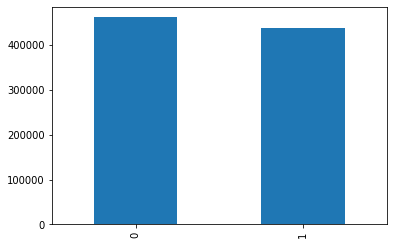

In [ ]:
s = df_train.target.value_counts() # Кол-во 1 и 0 в столбце target
s1 = sum(df_train["target"]) / len(df_train["target"]) # вычисление процента оттока
print(s)
print('Процент данных показывающих целевую группу', round(s1,2))
s.plot(kind='bar')
plt.show() # строительство графика

In [ ]:
target_class = pd.DataFrame({'count': df_train.target.value_counts(),
                             'percentage': df_train['target'].value_counts() / df_train.shape[0] * 100
})

In [ ]:
target_class

,count,percentage
0,462161,51.351222
1,437839,48.648778


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Pie(values = target_class['count'],labels = target_class.index,hole = 0.6, 
                     hoverinfo ='label+percent'))
fig.update_traces(textfont_size = 12, hoverinfo ='label+percent',textinfo='label', 
                  showlegend = False,marker = dict(colors =["#201E1F","#FF4000"]),
                  title = dict(text = 'Target Distribution'))  
fig.show()

In [ ]:
def feature_engg(df):
    for i in range(10):
        df[f'ch{i}'] = df.f_27.str.get(i).apply(ord) - ord('A')
        df["unique_characters"] = df.f_27.apply(lambda s: len(set(s)))
    return df

In [ ]:
for df in [df_train, df_test]:
    df = feature_engg(df)

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
features = [feature for feature in df_train.columns if feature not in ['id', 'f_27', 'target']]
df_train[features] = st.fit_transform(df_train[features])
df_test[features] = st.transform(df_test[features])

In [ ]:
df_train.drop(columns = ['id','f_27'], inplace = True)
df_test.drop(columns = ['id','f_27'], inplace = True)

In [ ]:
pip install lightautoml

In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [ ]:
task = Task('binary')
roles = {'target': 'target'}
THREADS = 12
FOLDS = 15
RANDOM = 42
SIZE = 0.15
TIMEOUT = 28800
TARGET = 'target'

In [ ]:
automl = TabularAutoML(task = task, timeout = TIMEOUT, cpu_limit = THREADS,
                       reader_params = {'n_jobs': THREADS, 'cv': FOLDS, 'random_state': RANDOM})
pred = automl.fit_predict(df_train, roles = roles, verbose=3)

[08:21:53] Stdout logging level is INFO3.
[08:21:53] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[08:21:53] Task: binary

[08:21:53] Start automl preset with listed constraints:
[08:21:53] - time: 28800.00 seconds
[08:21:53] - CPU: 12 cores
[08:21:53] - memory: 16 GB

[08:21:53] Train data shape: (900000, 42)

[08:22:04] Feats was rejected during automatic roles guess: []
[08:22:04] Layer 1 train process start. Time left 28788.93 secs
[08:22:12] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[08:22:12] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[08:22:15] Linear model: C = 1e-05 score = 0.7629548048858048
[08:22:19] Linear model: C = 5e-05 score = 0.7643100786547143
[08:22:21] Linear model: C = 0.0001 score = 0.7644049891265037
[08:22:23] Linear model: C = 0.0005 score = 0.7643716480941735
[08:22:23] Linear model: C = 0.001 score = 0.7643716480941735
[08:22:23] ===== Start working with fold 1 for Lvl_0_Pip

In [ ]:
predict_data = pred.data[:, 0]

In [ ]:
predict_test = automl.predict(df_test)

In [ ]:
df_test['target'] = predict_test.data[:, 0]

In [ ]:
df_subm['target'] = df_test['target']
df_subm

,id,target
0,900000,9.991659e-01
1,900001,9.987930e-01
2,900002,1.132720e-05
3,900003,4.495478e-03
4,900004,9.989163e-01
...,...,...
699995,1599995,6.291347e-01
699996,1599996,9.994101e-01
699997,1599997,1.375234e-01
699998,1599998,1.546100e-02


In [ ]:
df_subm.to_csv('submission_may2022.csv', index=False)